In [1]:
library(Sleuth3)
library("readxl")
library(car) 

Loading required package: carData



In [2]:
espresso <- read_excel("data/espresso2.xlsx")

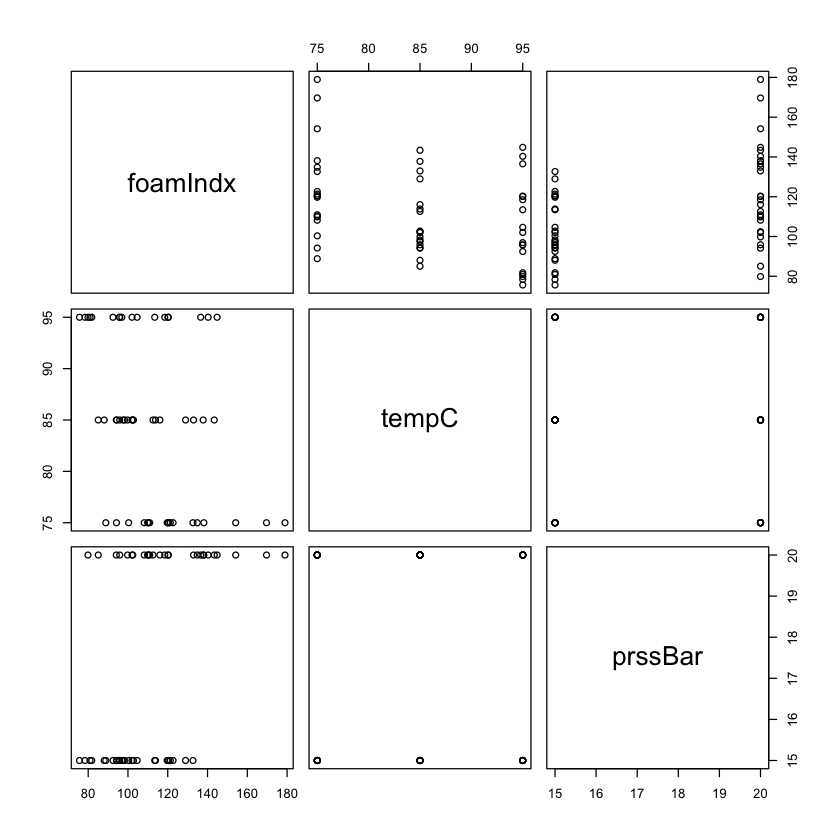

In [3]:
myMatrix <- cbind(espresso["foamIndx"], espresso["tempC"], espresso["prssBar"])
pairs(myMatrix)

In [4]:
lm_full <- lm(espresso$foamIndx ~ espresso$tempC + espresso$prssBar)
lm_temp <- lm(espresso$foamIndx ~ espresso$tempC)
lm_press <- lm(espresso$foamIndx ~ espresso$prssBar)

In [5]:
print(lm_full)
print(lm_temp)
print(lm_press)


Call:
lm(formula = espresso$foamIndx ~ espresso$tempC + espresso$prssBar)

Coefficients:
     (Intercept)    espresso$tempC  espresso$prssBar  
        127.1629           -0.9925            3.9667  


Call:
lm(formula = espresso$foamIndx ~ espresso$tempC)

Coefficients:
   (Intercept)  espresso$tempC  
      196.5795         -0.9925  


Call:
lm(formula = espresso$foamIndx ~ espresso$prssBar)

Coefficients:
     (Intercept)  espresso$prssBar  
          42.800             3.967  



In [6]:
anova(lm_full, lm_temp)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,51,18493.03,NA,NA,NA,NA
2,52,23803.41,-1,-5310.375,14.64493,0.0003557753


In [7]:
anova(lm_full, lm_press)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,51,18493.03,NA,NA,NA,NA
2,52,22039.24,-1,-3546.203,9.7797,0.002913372


In [8]:
influences <- influence.measures(lm_full)

In [9]:
# Evaluate Collinearity
vif(lm_full) # variance inflation factors

espresso$tempC espresso$prssBar 
               1                1

In [10]:
sqrt(vif(lm_full)) #if > 2, we may have multicollinearity problem

espresso$tempC espresso$prssBar 
               1                1

$ Y_{Crema} = \beta_{temp} \cdot X_{temp} + \beta_{press} \cdot X_{press} $

$ Y_{Crema} = \beta_{temp} \cdot X_{temp} $

$ Y_{Crema} = \beta_{press} \cdot X_{press} $

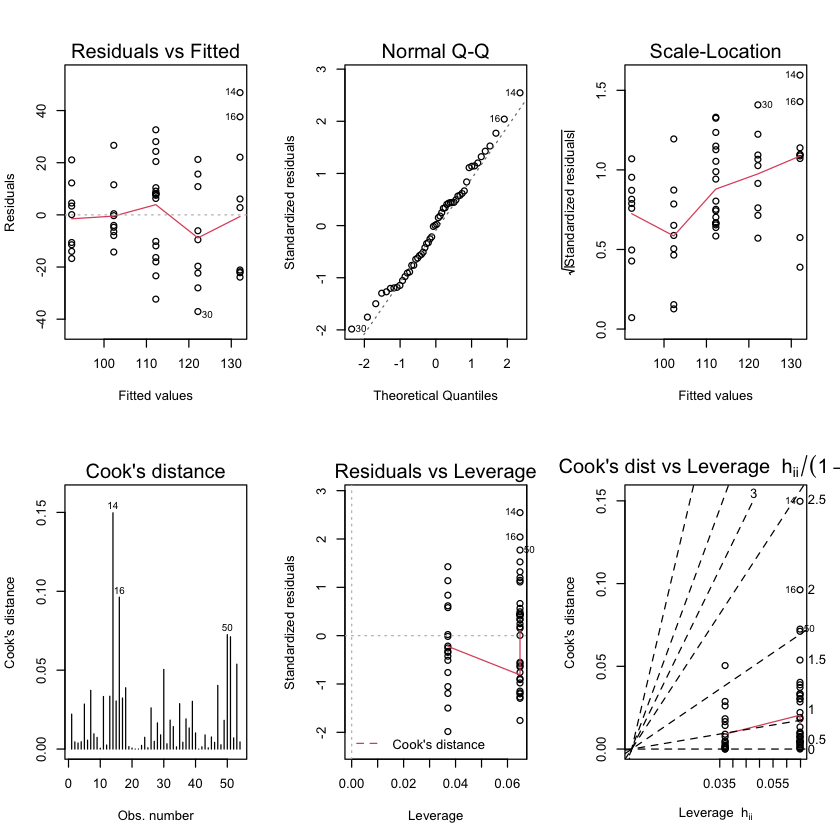

In [11]:
par(mfrow=c(2,3))
plot(lm_full, which=c(1,2,3,4,5,6))

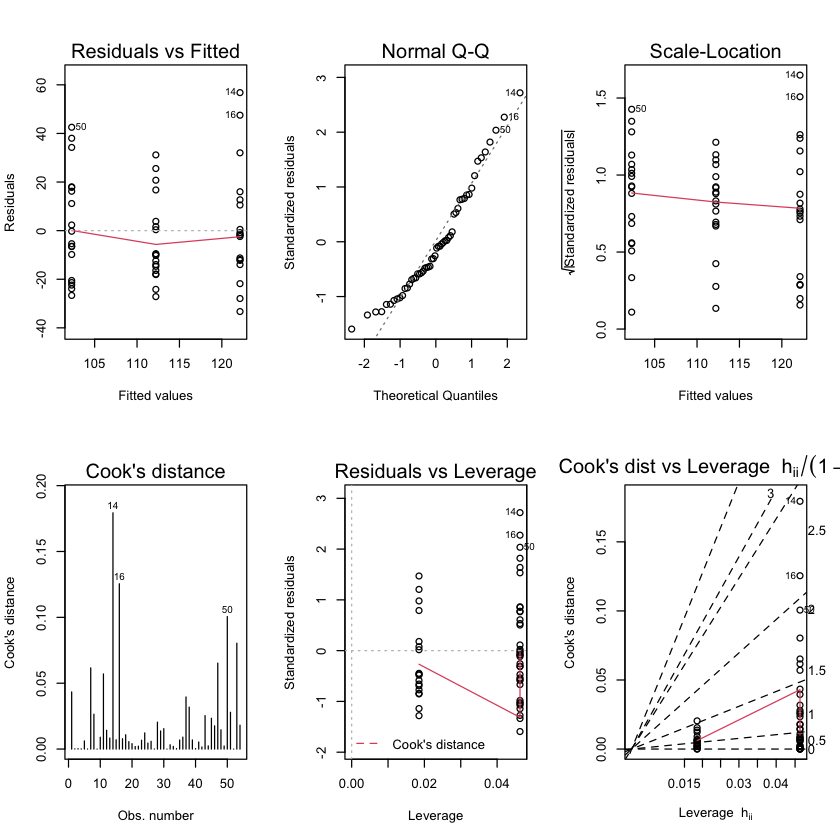

In [12]:
par(mfrow=c(2,3))
plot(lm_temp, which=c(1,2,3,4,5,6))

hat values (leverages) are all = 0.03703704
 and there are no factor predictors; no plot no. 5



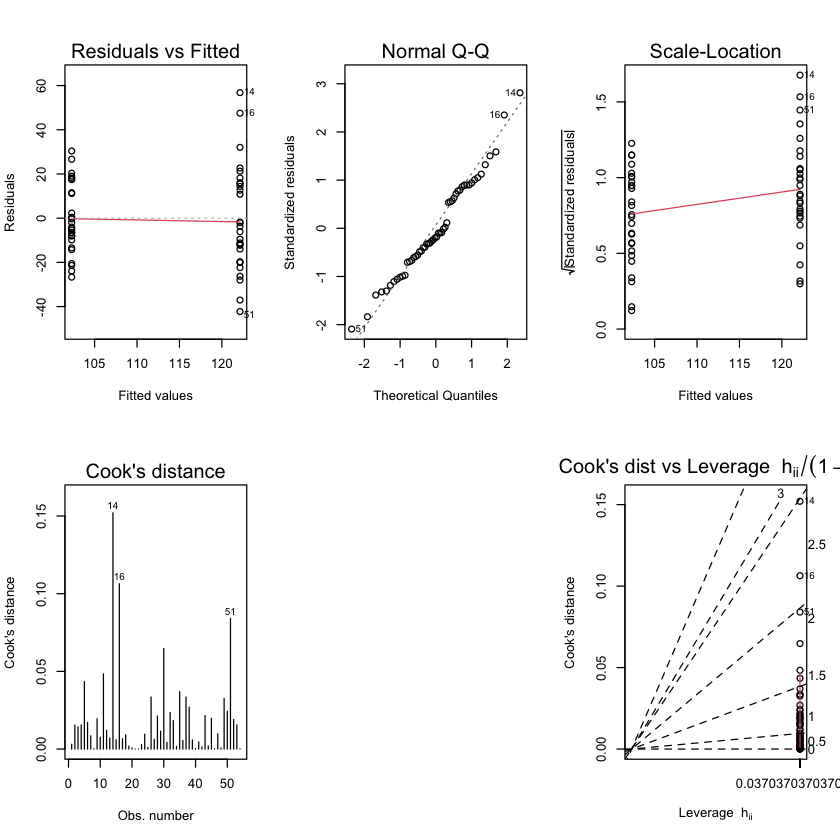

In [13]:
par(mfrow=c(2,3))
plot(lm_press, which=c(1,2,3,4,5,6))